In [240]:
import numpy as np
import pandas as pd
import FinanceDataReader as  fdr
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [242]:
df = fdr.DataReader('^SPX')
display(df)

,Open,High,Low,Close,Volume,Adj Close
1979-12-31,0.000000,108.529999,107.260002,107.940002,31530000,107.940002
1980-01-02,0.000000,108.430000,105.290001,105.760002,40610000,105.760002
1980-01-03,0.000000,106.080002,103.260002,105.220001,50480000,105.220001
1980-01-04,0.000000,107.080002,105.089996,106.519997,39130000,106.519997
1980-01-07,0.000000,107.800003,105.800003,106.809998,44500000,106.809998
...,...,...,...,...,...,...
2025-01-31,6096.790039,6120.910156,6030.930176,6040.529785,4843770000,6040.529785
2025-02-03,5969.649902,6022.129883,5923.930176,5994.569824,4797210000,5994.569824
2025-02-04,5998.140137,6042.479980,5990.870117,6037.879883,4410160000,6037.879883
2025-02-05,6020.450195,6062.859863,6007.060059,6061.479980,4756250000,6061.479980


In [243]:
df = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
df['MA5'] = df['Close'].rolling(window=5).mean()
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA20'] = df['Close'].rolling(window=20).mean()

df.to_csv('./S&P500_MA5_10_20.csv')

In [244]:
raw_df = pd.read_csv('./S&P500_MA5_10_20.csv')
raw_df.head()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,MA5,MA10,MA20
0,1979-12-31,0.0,108.529999,107.260002,107.940002,107.940002,31530000,NaN,NaN,NaN
1,1980-01-02,0.0,108.430000,105.290001,105.760002,105.760002,40610000,NaN,NaN,NaN
2,1980-01-03,0.0,106.080002,103.260002,105.220001,105.220001,50480000,NaN,NaN,NaN
3,1980-01-04,0.0,107.080002,105.089996,106.519997,106.519997,39130000,NaN,NaN,NaN
4,1980-01-07,0.0,107.800003,105.800003,106.809998,106.809998,44500000,106.45,NaN,NaN


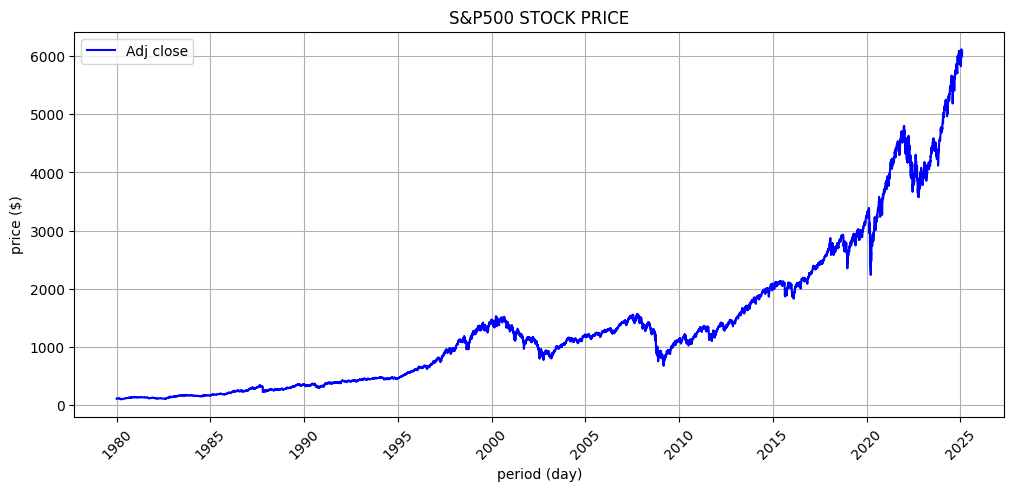

In [245]:
df = fdr.DataReader('^SPX')
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Adj Close'], label='Adj close', color='b')
plt.title('S&P500 STOCK PRICE')
plt.xlabel('period (day)')
plt.ylabel('price ($)')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.grid()
plt.show()

In [246]:
raw_df.describe()

,Open,High,Low,Close,Adj Close,Volume,MA5,MA10,MA20
count,11370.000000,11370.000000,11370.000000,11370.000000,11370.000000,1.137000e+04,11366.000000,11361.000000,11351.000000
mean,1363.736262,1377.907650,1361.537440,1370.269141,1370.269141,1.972845e+09,1369.667006,1368.916647,1367.415996
std,1289.950941,1290.141367,1276.626835,1283.808208,1283.808208,1.907030e+09,1282.301967,1280.459403,1276.783555
min,0.000000,99.580002,94.230003,98.220001,98.220001,1.499000e+07,99.210001,100.534000,101.296500
25%,372.532509,374.897491,370.384995,373.007492,373.007492,1.902200e+08,373.352499,374.026996,375.825499
50%,1113.875000,1120.415039,1106.420044,1113.875000,1113.875000,1.294900e+09,1112.845007,1112.219006,1112.398505
75%,1734.374969,1742.345032,1731.854980,1739.705017,1739.705017,3.605615e+09,1726.656030,1715.888025,1707.712012
max,6121.430176,6128.180176,6088.740234,6118.709961,6118.709961,1.145623e+10,6077.260059,6065.085010,6027.006982


In [247]:
raw_df.isnull().sum()

Unnamed: 0     0
Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
MA5            4
MA10           9
MA20          19
dtype: int64

In [248]:
raw_df['Open'] = raw_df['Open'].replace(0, np.nan)

for col in raw_df.columns:
    missing_rows = raw_df.loc[raw_df[col]==0].shape[0]
    print(col + ': ' + str(missing_rows))

Unnamed: 0: 0
Open: 0
High: 0
Low: 0
Close: 0
Adj Close: 0
Volume: 0
MA5: 0
MA10: 0
MA20: 0


In [249]:
raw_df.isnull().sum()

Unnamed: 0      0
Open          581
High            0
Low             0
Close           0
Adj Close       0
Volume          0
MA5             4
MA10            9
MA20           19
dtype: int64

In [250]:
raw_df = raw_df.dropna()
raw_df.isnull().sum()

Unnamed: 0    0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
MA5           0
MA10          0
MA20          0
dtype: int64

In [251]:
scaler = MinMaxScaler()
scaled_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 
              'MA5', 'MA10', 'MA20', 'Volume']
scaled_df = scaler.fit_transform(raw_df[scaled_cols])
print(type(scaled_df))
scaled_df = pd.DataFrame(scaled_df, columns=scaled_cols)
print(scaled_df)

<class 'numpy.ndarray'>
           Open      High       Low  ...      MA10      MA20    Volume
0      0.002223  0.002345  0.002110  ...  0.001987  0.001360  0.003463
1      0.002170  0.002134  0.002188  ...  0.001993  0.001378  0.003743
2      0.002210  0.002363  0.002258  ...  0.002022  0.001414  0.004325
3      0.002592  0.002594  0.002504  ...  0.002063  0.001460  0.004969
4      0.002745  0.002709  0.002681  ...  0.002117  0.001522  0.003978
...         ...       ...       ...  ...       ...       ...       ...
10784  0.995906  0.998793  0.990343  ...  0.998865  0.991978  0.422050
10785  0.974783  0.982399  0.972470  ...  0.998830  0.993043  0.417981
10786  0.979517  0.985776  0.983652  ...  0.998640  0.993848  0.384152
10787  0.983223  0.989159  0.986356  ...  0.998222  0.994576  0.414401
10788  0.991824  0.992121  0.995415  ...  0.997505  0.995986  0.090294

[10789 rows x 9 columns]


In [252]:
feature_cols = ['MA5', 'MA10', 'MA20', 'Adj Close']
feature_df = pd.DataFrame(scaled_df, columns=feature_cols)
label_df = feature_df
feature_np = feature_df.to_numpy()
label_np = label_df.to_numpy()
#print(feature_df)
#print(label_df)
print(label_np[:3, :])

[[0.00222552 0.00198694 0.00136011 0.00216413]
 [0.00222184 0.00199298 0.00137844 0.00221067]
 [0.00224996 0.00202201 0.00141408 0.002455  ]]


In [253]:
def seq2dataSet(feat, lab, wid_size):
    feat_list, lab_list = [], []
    for i in range(len(feat) - wid_size):
        feat_list.append(feat[i:i+wid_size])
        lab_list.append(lab[i+wid_size, :])
    return np.array(feat_list), np.array(lab_list)

In [254]:
X, Y = seq2dataSet(feature_np, label_np, wid_size=40)
print(X.shape, Y.shape)

(10749, 40, 4) (10749, 4)


In [255]:
print(X.shape[0])

10749


In [256]:
split_ratio = 0.9
split = int(X.shape[0] * split_ratio)

x_train = X[:split]
t_train = Y[:split]
x_test = X[split:]
t_test = Y[split:]
print(x_train.shape, x_test.shape, 
      t_train.shape, t_test.shape)

(9674, 40, 4) (1075, 40, 4) (9674, 4) (1075, 4)


In [257]:
rnn = Sequential()
rnn.add(LSTM(128, activation='tanh', input_shape=x_train[0].shape))
rnn.add(Dense(4, activation='linear'))
rnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 128)               68096     
                                                                 
 dense_2 (Dense)             (None, 4)                 516       
                                                                 
Total params: 68,612
Trainable params: 68,612
Non-trainable params: 0
_________________________________________________________________


In [258]:
rnn.compile(loss='mse', optimizer='Adam', metrics=['mae'])
rnn.fit(x_train, t_train, batch_size=32, epochs=100, validation_data=(x_test, t_test), 
        callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)])

Epoch 1/100
303/303 [==============================] - 3s 8ms/step - loss: 5.6854e-04 - mae: 0.0070 - val_loss: 7.0652e-04 - val_mae: 0.0204
Epoch 2/100
303/303 [==============================] - 2s 7ms/step - loss: 1.4614e-05 - mae: 0.0021 - val_loss: 0.0011 - val_mae: 0.0282
Epoch 3/100
303/303 [==============================] - 2s 7ms/step - loss: 1.3528e-05 - mae: 0.0020 - val_loss: 4.2206e-04 - val_mae: 0.0158
Epoch 4/100
303/303 [==============================] - 2s 8ms/step - loss: 1.3130e-05 - mae: 0.0021 - val_loss: 3.3636e-04 - val_mae: 0.0136
Epoch 5/100
303/303 [==============================] - 2s 8ms/step - loss: 1.1168e-05 - mae: 0.0019 - val_loss: 7.8555e-04 - val_mae: 0.0246
Epoch 6/100
303/303 [==============================] - 2s 8ms/step - loss: 9.8606e-06 - mae: 0.0018 - val_loss: 2.6967e-04 - val_mae: 0.0122
Epoch 7/100
303/303 [==============================] - 2s 7ms/step - loss: 8.7386e-06 - mae: 0.0018 - val_loss: 1.8129e-04 - val_mae: 0.0099
Epoch 8/100
303/3

In [259]:
t_test[:,[0]]

array([[0.55676334],
       [0.55125544],
       [0.54645558],
       ...,
       [0.99320959],
       [0.99395176],
       [0.99411278]])

34/34 [==============================] - 1s 9ms/step


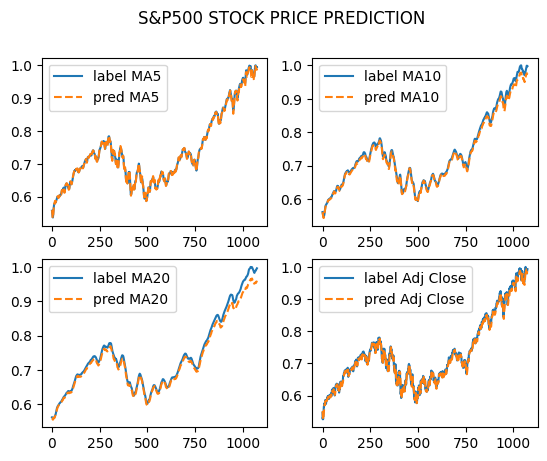

In [260]:
pred = rnn.predict(x_test)

fig, ax = plt.subplots(2, 2)

predlabel = ['pred MA5', 'pred MA10', 'pred MA20', 'pred Adj Close']
label2 = ['label MA5', 'label MA10', 'label MA20', 'label Adj Close']

fig.suptitle('S&P500 STOCK PRICE PREDICTION')

ax[0, 0].plot(t_test[:, 0], label=label2[0])
ax[0, 0].plot(pred[:, 0], '--', label=predlabel[0])
ax[0, 0].legend(loc='best')

ax[0, 1].plot(t_test[:, 1], label=label2[1])
ax[0, 1].plot(pred[:, 1], '--', label=predlabel[1])
ax[0, 1].legend(loc='best')

ax[1, 0].plot(t_test[:, 2], label=label2[2])
ax[1, 0].plot(pred[:, 2], '--', label=predlabel[2])
ax[1, 0].legend(loc='best')

ax[1, 1].plot(t_test[:, 3], label=label2[3])
ax[1, 1].plot(pred[:, 3], '--', label=predlabel[3])
ax[1, 1].legend(loc='best')

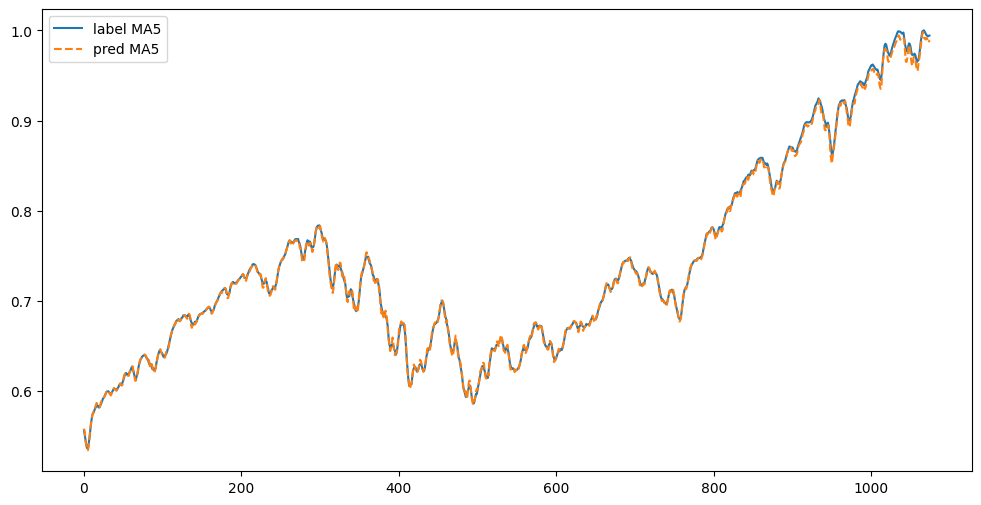

In [261]:
plt.figure(figsize=(12, 6))
plt.plot(t_test[:, 0], label=label2[0])
plt.plot(pred[:, 0], '--', label=predlabel[0])
plt.legend(loc='best')

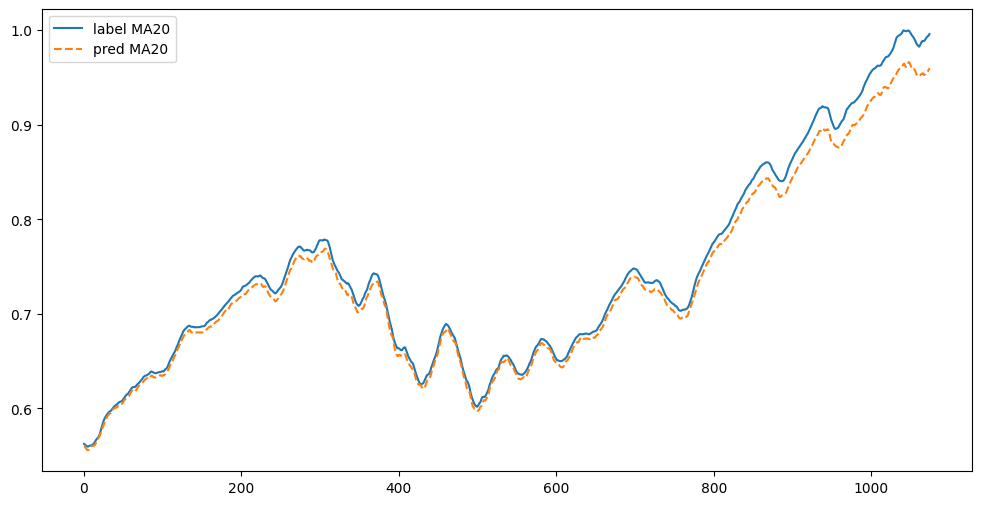

In [262]:
plt.figure(figsize=(12, 6))
plt.plot(t_test[:, 2], label=label2[2])
plt.plot(pred[:, 2], '--', label=predlabel[2])
plt.legend(loc='best')

In [263]:
Scaler = MinMaxScaler()
dfx_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
dfx = Scaler.fit_transform(df[dfx_cols])
dfx = pd.DataFrame(dfx, columns=dfx_cols)
dfy = dfx[['Close']]
dfy

,Close
0,0.001614
1,0.001252
2,0.001163
3,0.001379
4,0.001427
...,...
11365,0.987014
11366,0.979380
11367,0.986574
11368,0.990494


In [264]:
pred[:, :]

array([[0.5585712 , 0.5606222 , 0.5598635 , 0.5517219 ],
       [0.55487365, 0.55863726, 0.55994767, 0.5472712 ],
       [0.5446393 , 0.5535472 , 0.55814534, 0.5335807 ],
       ...,
       [0.9864979 , 0.9750094 , 0.95662576, 0.9773053 ],
       [0.9865508 , 0.9754579 , 0.95816624, 0.9788579 ],
       [0.9891291 , 0.97633183, 0.96002483, 0.98271096]], dtype=float32)

In [265]:
df

,Open,High,Low,Close,Volume,Adj Close
1979-12-31,0.000000,108.529999,107.260002,107.940002,31530000,107.940002
1980-01-02,0.000000,108.430000,105.290001,105.760002,40610000,105.760002
1980-01-03,0.000000,106.080002,103.260002,105.220001,50480000,105.220001
1980-01-04,0.000000,107.080002,105.089996,106.519997,39130000,106.519997
1980-01-07,0.000000,107.800003,105.800003,106.809998,44500000,106.809998
...,...,...,...,...,...,...
2025-01-31,6096.790039,6120.910156,6030.930176,6040.529785,4843770000,6040.529785
2025-02-03,5969.649902,6022.129883,5923.930176,5994.569824,4797210000,5994.569824
2025-02-04,5998.140137,6042.479980,5990.870117,6037.879883,4410160000,6037.879883
2025-02-05,6020.450195,6062.859863,6007.060059,6061.479980,4756250000,6061.479980


In [266]:
Twom_STOCK_PRICE = df.Close[-1] * pred[[-1], 3] / dfy.Close[11369]

print(f"A 25-02-06 STOCK PRICE: ${Twom_STOCK_PRICE}")

A 25-02-06 STOCK PRICE: $[6013.617]


C:\Users\skygr\AppData\Local\Temp\ipykernel_10992\3778003546.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Twom_STOCK_PRICE = df.Close[-1] * pred[[-1], 3] / dfy.Close[11369]


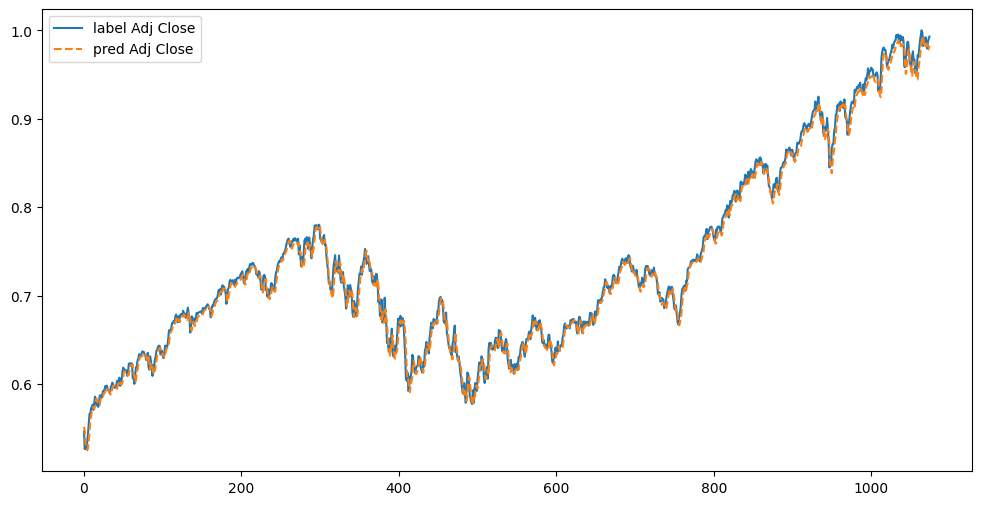

In [267]:
plt.figure(figsize=(12, 6))
plt.plot(t_test[:, 3], label=label2[3])
plt.plot(pred[:, 3], '--', label=predlabel[3])
plt.legend(loc='best')